In [49]:
import random
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import interp
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [50]:
input_data_dir = "data"
output_dir = "results"

os.makedirs(output_dir, exist_ok=True)

In [51]:
disease_name = pd.read_csv(os.path.join(input_data_dir, 'disease_name.csv'),header=None)
snoRNA_name = pd.read_csv(os.path.join(input_data_dir, 'snoRNA_name.csv'),header=None)
SnoRNA_similarity = pd.read_csv(os.path.join(output_dir, 'IRS_matrix.csv'), header=None)
known_association = pd.read_csv(os.path.join(input_data_dir, 'known_snoRNA_disease.csv'), header=None)
disease_similarity = pd.read_csv(os.path.join(output_dir, 'IDS_matrix.csv'), header=None)
disease_name.shape , snoRNA_name.shape , SnoRNA_similarity.shape , known_association.shape , disease_similarity.shape

((112, 2), (335, 1), (335, 335), (335, 112), (112, 112))

In [52]:





disease_name = pd.read_csv(os.path.join(input_data_dir, 'disease_name.csv'),header=None)
snoRNA_name = pd.read_csv(os.path.join(input_data_dir, 'snoRNA_name.csv'),header=None)
SnoRNA_similarity = pd.read_csv(os.path.join(output_dir, 'snoRNA_similarity.csv'))
known_association = pd.read_csv(os.path.join(input_data_dir, 'known_snoRNA_disease.csv'), header=None)
disease_similarity = pd.read_csv(os.path.join(input_data_dir, 'disease_similarity.csv'), header=None)


disease_name.shape , snoRNA_name.shape , SnoRNA_similarity.shape , known_association.shape , disease_similarity.shape


((112, 2), (335, 1), (335, 335), (335, 112), (112, 112))

In [53]:


disease_semantic_similarity = np.zeros(disease_similarity.shape) 
snoRNA_functional_similarity = np.zeros(SnoRNA_similarity.shape) 
adjacency_matrix = np.zeros(known_association.shape) 

In [54]:
def test(a):
        
    if(type(a)==list):
        return("length:",len(a)," sample length:",len(a[0]))
    elif(type(a)==np.ndarray):
        return("shape:",a.shape," sample length:",a[0].shape())
    else:
        return("type:",type(a)," sample:",a.iloc[0])
        

In [55]:
disease_semantic_similarity = disease_similarity.values
snoRNA_functional_similarity = SnoRNA_similarity.values
adjacency_matrix = known_association.values

In [56]:
adjacency_matrix.shape , disease_semantic_similarity.shape , snoRNA_functional_similarity.shape

((335, 112), (112, 112), (335, 335))

In [57]:
unknown = []
known = []
for x in range(known_association.shape[0]):
    for y in range(known_association.shape[1]):
        if adjacency_matrix[x, y] == 0:
            unknown.append((x, y))
        else:
            known.append((x, y))

         
major = []
for z in range(len(unknown)):
    a = disease_semantic_similarity[unknown[z][1], :].tolist()
    b = snoRNA_functional_similarity[unknown[z][0], :].tolist()
    q = a + b
    major.append(q) 

In [58]:
len(unknown), len(known), len(major)

(36510, 1010, 36510)

In [59]:
n_clusters = 23
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(major)
labels = kmeans.labels_

disease_rna_tup = defaultdict(list)
for (rna, dis), label in zip(unknown, labels):
    disease_rna_tup[label].append((rna, dis))



c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

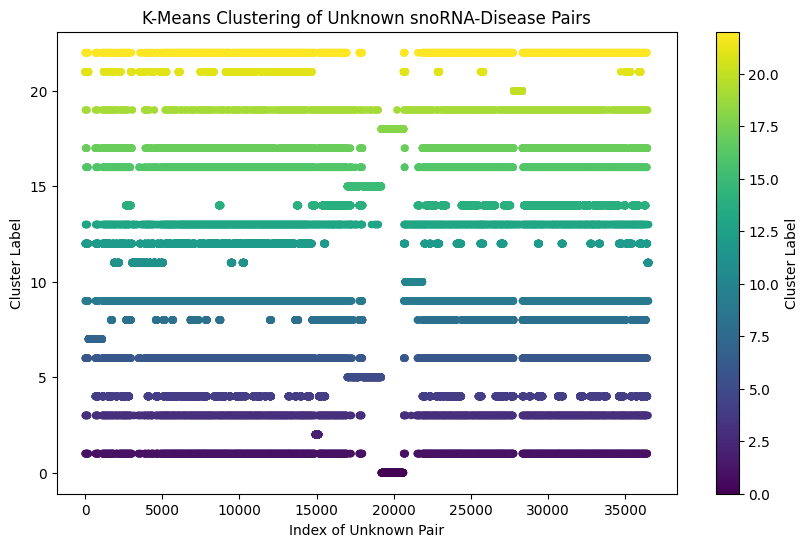

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap='viridis', s=20)
plt.title('K-Means Clustering of Unknown snoRNA-Disease Pairs')
plt.xlabel('Index of Unknown Pair')
plt.ylabel('Cluster Label')
plt.colorbar(label='Cluster Label')
plt.show()

In [61]:
print("Final datasets are being prepared now..")
sampled_disease_rna_tup = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
n = 0
for i in range(len(disease_rna_tup)):
    sampled_disease_rna_tup[i] = random.sample(disease_rna_tup[i], int((len(disease_rna_tup[i])/len(labels)) * len(known)))

dataset = []
for rna in range(known_association.shape[0]):
    for disease in range(known_association.shape[1]):
        for i in range(len(sampled_disease_rna_tup)):
            if (rna, disease) in sampled_disease_rna_tup[i]:
                dataset.append((rna, disease))


for rna in range(known_association.shape[0]):
    for disease in range(known_association.shape[1]):
        if (rna, disease) in known:
            dataset.append((rna, disease))

length = len(dataset)
print(length)


Final datasets are being prepared now..
2007


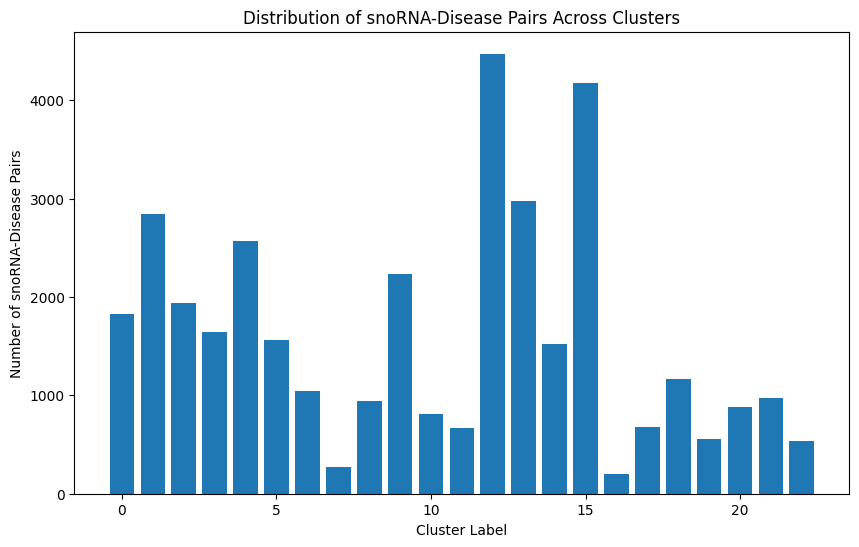

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), [len(cluster) for cluster in disease_rna_tup.values()])
plt.xlabel('Cluster Label')
plt.ylabel('Number of snoRNA-Disease Pairs')
plt.title('Distribution of snoRNA-Disease Pairs Across Clusters')
plt.show()

In [63]:
selected_x = []
selected_y = []
#now I am just taking only the similarities of disease and rna of sampled data.
for data in dataset:
    a = disease_semantic_similarity[data[1], :].tolist()
    b = snoRNA_functional_similarity[data[0], :].tolist()
    q = a + b
    selected_x.append(q)

    if (data[0], data[1]) in known:
        selected_y.append(1)
    else:
        selected_y.append(0)

selected_data_np = np.array(selected_x)
selected_label_np = np.array(selected_y)



In [64]:
GBDT = GradientBoostingClassifier(n_estimators=12, max_depth=5, min_samples_leaf=3)
GBDT.fit(selected_data_np, selected_label_np)

OHE = OneHotEncoder()
OHE.fit(GBDT.apply(selected_data_np)[:, :, 0])

OneHotEncoder()

In [65]:



classifiers = {
    "SVM": (
        SVC(kernel='rbf', probability=True),
        {'clf__C': [0.1, 1, 10, 100], 'clf__gamma': [1, 0.1, 0.01, 0.001]}
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {'clf__n_estimators': [50, 100], 'clf__max_depth': [None, 5, 10]}
    ),
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {'clf__C': [0.01, 0.1, 1, 10]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}
    )

}

In [66]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(8, 6))
mean_fpr = np.linspace(0, 1, 100)

<Figure size 800x600 with 0 Axes>

 Running GBDT + SVM classifier...
  Fold 1 : ROC AUC: 0.9584 Accuracy: 0.9328
  Fold 2 : ROC AUC: 0.9399 Accuracy: 0.9005
  Fold 3 : ROC AUC: 0.9381 Accuracy: 0.9002
  Fold 4 : ROC AUC: 0.9481 Accuracy: 0.9177
  Fold 5 : ROC AUC: 0.9348 Accuracy: 0.8978
SVM Mean ROC AUC: 0.9446
SVM Mean Accuracy: 0.9098
 Running GBDT + RandomForest classifier...
  Fold 1 : ROC AUC: 0.9713 Accuracy: 0.9303
  Fold 2 : ROC AUC: 0.9475 Accuracy: 0.8905
  Fold 3 : ROC AUC: 0.9577 Accuracy: 0.9102
  Fold 4 : ROC AUC: 0.9667 Accuracy: 0.9127
  Fold 5 : ROC AUC: 0.9518 Accuracy: 0.8978
RandomForest Mean ROC AUC: 0.9594
RandomForest Mean Accuracy: 0.9083
 Running GBDT + LogisticRegression classifier...
  Fold 1 : ROC AUC: 0.9787 Accuracy: 0.9453
  Fold 2 : ROC AUC: 0.9637 Accuracy: 0.9080
  Fold 3 : ROC AUC: 0.9675 Accuracy: 0.9202
  Fold 4 : ROC AUC: 0.9803 Accuracy: 0.9327
  Fold 5 : ROC AUC: 0.9590 Accuracy: 0.9102
LogisticRegression Mean ROC AUC: 0.9685
LogisticRegression Mean Accuracy: 0.9233
 Running GBDT

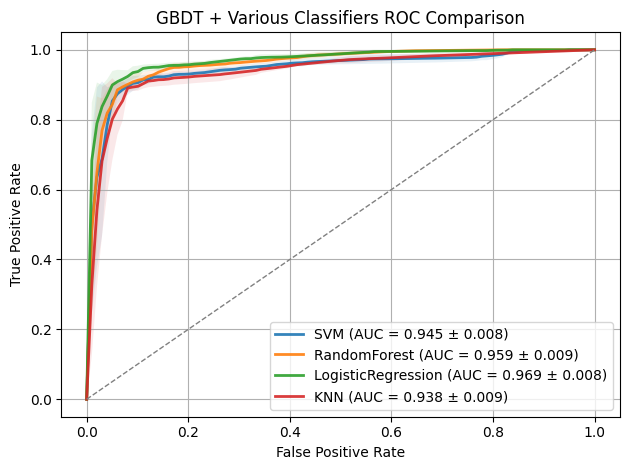

: 

In [ ]:
for name, (clf, param_grid) in classifiers.items():

    print(f" Running GBDT + {name} classifier...")

    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', clf)
    ])

    grid = GridSearchCV(pipeline, param_grid, cv=3)

    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)
    roc_auc_scores = []
    scores = []
    i = 0

    for train_index, test_index in stratified_k_fold.split(selected_data_np, selected_label_np):
        X_train, X_test = selected_data_np[train_index], selected_data_np[test_index]
        y_train, y_test = selected_label_np[train_index], selected_label_np[test_index]

        X_train_trans = OHE.transform(GBDT.apply(X_train)[:, :, 0])
        X_test_trans = OHE.transform(GBDT.apply(X_test)[:, :, 0])

        grid.fit(X_train_trans, y_train)
        predicted_probs = grid.predict_proba(X_test_trans)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, predicted_probs)
        roc_auc = auc(fpr, tpr)


        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

        roc_auc_scores.append(roc_auc)
        scores.append(grid.score(X_test_trans, y_test))
        i += 1

        print(f"  Fold {i} : ROC AUC: {roc_auc:.4f} Accuracy: {grid.score(X_test_trans, y_test):.4f}")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(
        mean_fpr,
        mean_tpr,
        label=f'{name} (AUC = {mean_auc:.3f} ± {std_auc:.3f})',
        lw=2,
        alpha=0.9
    )

    std_tpr = np.std(tprs, axis=0)
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.1)

    print(f"{name} Mean ROC AUC: {mean_auc:.4f}")
    print(f"{name} Mean Accuracy: {np.mean(scores):.4f}")


plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBDT + Various Classifiers ROC Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
